# Basic plotting figures

## Imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import xarray as xr
import pandas as pd
import numpy as np
import cmocean.cm as cmo
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.feature as cpf
import gsw


fontsize = 12

## Load glider data

In [2]:
gridded_glider = xr.open_dataset('../data/processed_nc/RU29_2024_depth_gridded_glider.nc')

## Taken from RU29_ABC2DR_Analysis.ipynb
transect1_start_time = pd.to_datetime('2024-04-27T20:05:00Z').tz_localize(None) ## transect 1 start time
transect1_end_time = pd.to_datetime('2024-05-18T12:00:00Z').tz_localize(None) ## transect 1 end time
transect2_start_time = pd.to_datetime('2024-05-19T00:00:00Z').tz_localize(None) ## transect 2 start time
transect2_end_time = pd.to_datetime('2024-06-06T00:00:00Z').tz_localize(None) ## transect 2 end time

transect1_glider = gridded_glider.sel(time=slice(transect1_start_time,transect1_end_time))
transect2_glider = gridded_glider.sel(time=slice(transect2_start_time,transect2_end_time))

subset_glider = gridded_glider.sel(time=slice(None,transect2_end_time))

gridded_glider

<xarray.Dataset> Size: 97MB
Dimensions:                          (depth: 499, time: 1351)
Coordinates:
  * depth                            (depth) float64 4kB 1.0 3.0 ... 995.0 997.0
  * time                             (time) datetime64[ns] 11kB 2024-04-19T14...
    latitude                         (time) float64 11kB ...
    longitude                        (time) float64 11kB ...
Data variables: (12/18)
    ctd_time                         (depth, time) float64 5MB ...
    ctd_time_counts                  (depth, time) int64 5MB ...
    conductivity                     (depth, time) float64 5MB ...
    conductivity_counts              (depth, time) int64 5MB ...
    temperature                      (depth, time) float64 5MB ...
    temperature_counts               (depth, time) int64 5MB ...
    ...                               ...
    conservative_temperature         (depth, time) float64 5MB ...
    conservative_temperature_counts  (depth, time) int64 5MB ...
    rho                              (depth, time) float64 5MB ...
    rho_counts                       (depth, time) int64 5MB ...
    sigma                            (depth, time) float64 5MB ...
    sigma_counts                     (depth, time) int64 5MB ...

In [22]:
gridded_glider.absolute_salinity

<xarray.DataArray 'absolute_salinity' (depth: 499, time: 1351)> Size: 5MB
[674149 values with dtype=float64]
Coordinates:
  * depth      (depth) float64 4kB 1.0 3.0 5.0 7.0 ... 991.0 993.0 995.0 997.0
  * time       (time) datetime64[ns] 11kB 2024-04-19T14:23:50.975585938 ... 2...
    latitude   (time) float64 11kB ...
    longitude  (time) float64 11kB ...

In [ ]:
for x in len(gridded_glider.time):
    ## subsetting by profile (time)
    subset = gridded_glider.isel(time=x)
    ## vertical gradient of salinity
    ds_dz = np.append(0,np.diff(subset.absolute_salinity)/np.diff(subset.depth))
    gridded_glider['ds_dz'] = ds_dz



498

## Load bathymetry

In [3]:
fname = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/30s/30s_bed_elev_netcdf/ETOPO_2022_v1_30s_N90W180_bed.nc'
ds_etpo = xr.open_dataset(fname)
ds_etpo

<xarray.Dataset> Size: 4GB
Dimensions:  (lat: 21600, lon: 43200)
Coordinates:
  * lat      (lat) float64 173kB -90.0 -89.99 -89.98 -89.97 ... 89.98 89.99 90.0
  * lon      (lon) float64 346kB -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Data variables:
    crs      |S64 64B ...
    z        (lat, lon) float32 4GB ...
Attributes:
    GDAL_AREA_OR_POINT:             Area
    node_offset:                    1
    GDAL_TIFFTAG_COPYRIGHT:         DOC/NOAA/NESDIS/NCEI > National Centers f...
    GDAL_TIFFTAG_DATETIME:          20220929123913.0
    GDAL_TIFFTAG_IMAGEDESCRIPTION:  Topography-Bathymetry; EGM2008 height
    Conventions:                    CF-1.5
    GDAL:                           GDAL 3.3.2, released 2021/09/01
    NCO:                            netCDF Operators version 4.9.1 (Homepage ...
    DODS.strlen:                    0

## Load TS endmembers

In [6]:
end_member_profiles = pd.read_csv('../data/water_mass_analysis/naw_saw_endmember_t_s_d_profile.csv',index_col=0)
end_member_profiles

,density,naw_temp,naw_sal,saw_temp,saw_sal
0,1024.561582,26.084686,37.267245,23.707803,36.284954
1,1024.566582,26.072739,37.268895,23.690579,36.284890
2,1024.571582,26.060793,37.270546,23.673355,36.284826
3,1024.576582,26.048846,37.272197,23.656131,36.284763
4,1024.581582,26.036900,37.273847,23.638907,36.284699
...,...,...,...,...,...
598,1027.551582,6.250039,35.205249,3.993883,34.867760
599,1027.556582,6.214355,35.205720,3.999835,34.874869
600,1027.561582,6.178672,35.206192,4.005787,34.881979
601,1027.566582,6.142988,35.206664,4.011739,34.889089


## Load WOCE

In [7]:
a22 = xr.open_dataset("../data/A22/316N151_4_ctd.nc")

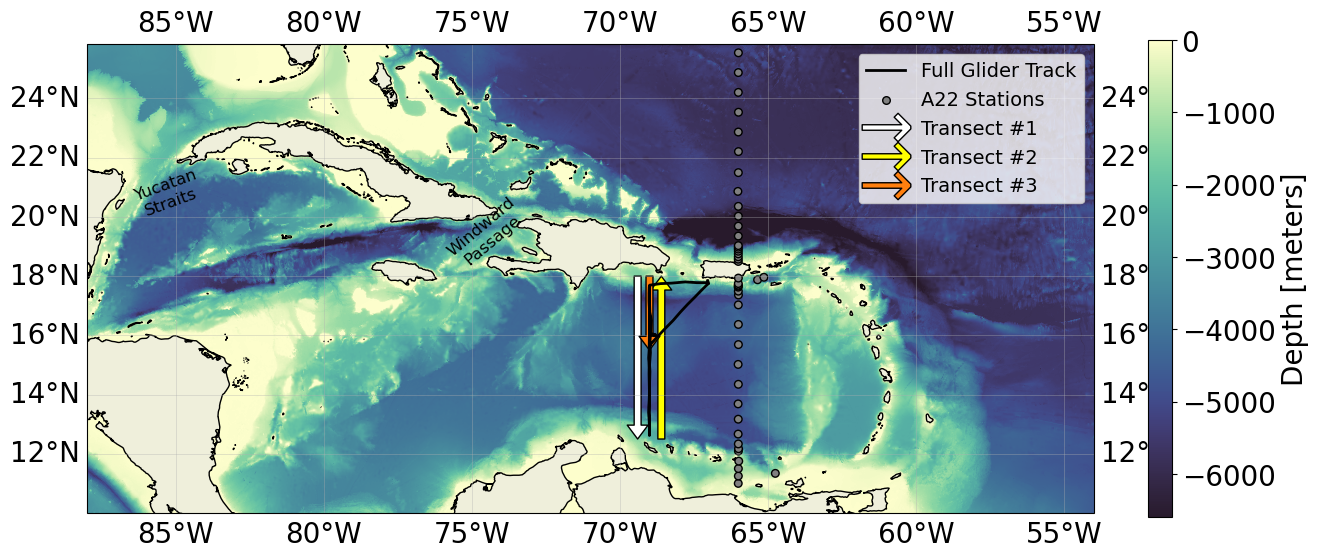

In [8]:
from matplotlib.lines import Line2D

## Map extent
lon1 = -88
lon2 = -54
lat1 = 10
lat2 = 25


lvl = [-4000, -3000, -2000, -1000, -500, -100]

## Depth contours to plot
dpth_contours = np.array([-6500, -5750,-5000,-4250,-3500,-2750,-2000, -1000,0])
## Subset bathymetry
region = ds_etpo.sel(lon=slice(lon1, lon2), lat=slice(lat1, lat2+5))


fig = plt.figure(figsize=(14,7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon1, lon2, lat1, lat2])


bathy = ax.pcolormesh(region.lon, region.lat, region.z,  cmap=cmo.deep_r ,  transform=ccrs.PlateCarree(), vmin=0,vmax=-6000,zorder=0)
cbar = plt.colorbar(bathy,pad=0.05, fraction=0.022)
cbar.set_label(label='Depth [meters]', size=20)
cbar.ax.tick_params(labelsize=20)



LAND = cfeature.NaturalEarthFeature(
    'physical', 'land', '10m',
    edgecolor='black',
    facecolor=cfeature.COLORS['land']
)
ax.add_feature(LAND, zorder=1)


width=5
headwidth=15
headlength=10

plt.annotate('', xy=(-69.4, 12.5), xytext=(-69.4, 18),
        xycoords=ccrs.PlateCarree(),
        arrowprops=dict(facecolor='white', ec = 'black',width=width,headwidth=headwidth,headlength=headlength),zorder= 1)
plt.annotate('', xy=(-68.6, 18), xytext=(-68.6, 12.5),
        xycoords=ccrs.PlateCarree(),
        arrowprops=dict(facecolor='yellow', ec = 'black',width=width,headwidth=headwidth,headlength=headlength),zorder= 1)
plt.annotate('', xy=(-69, 15.5), xytext=(-69, 18),
        xycoords=ccrs.PlateCarree(),
        arrowprops=dict(facecolor='tab:orange', ec = 'black',width=width,headwidth=headwidth,headlength=headlength),zorder= 1)

arrow_proxy1 = Line2D([0], [0], markerfacecolor="white",markeredgecolor="black", marker=r"$\rightarrow$", markersize=35, linestyle="None")
arrow_proxy2 = Line2D([0], [0], markerfacecolor="yellow",markeredgecolor="black", marker=r"$\rightarrow$", markersize=35, linestyle="None")
arrow_proxy3 = Line2D([0], [0], markerfacecolor="tab:orange",markeredgecolor="black", marker=r"$\rightarrow$", markersize=35, linestyle="None")


plt.plot(gridded_glider.longitude.values[::25],gridded_glider.latitude.values[::25],linewidth=2,color='black',zorder=3,label='Full Glider Track')
plt.scatter(a22.longitude.values,a22.latitude.values,s=np.repeat(30,len(a22.longitude.values)),color="grey",edgecolor='black',label='A22 Stations')


# Collect legend handles
handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([arrow_proxy1, arrow_proxy2, arrow_proxy3])
labels.extend(["Transect #1", "Transect #2", "Transect #3"])

plt.legend(handles, labels, fontsize=14,loc='upper right')

plt.text(-74.5,18.25,"Windward\nPassage",fontsize=12,color='black',rotation=40,horizontalalignment='center')
plt.text(-85.25,20,"Yucatan\nStraits",fontsize=12,color='black',rotation=20,horizontalalignment='center')



glb = ax.gridlines(draw_labels=True, alpha=0.5, linewidth=.5 )
glb.xlabels_top = glb.ylabels_right = False
glb.xlabel_style = {'size': 20}
glb.ylabel_style = {'size': 20}

plt.savefig('../figures/RU29_2024_ABC2DR_Full_Map.png', bbox_inches='tight', dpi=300)


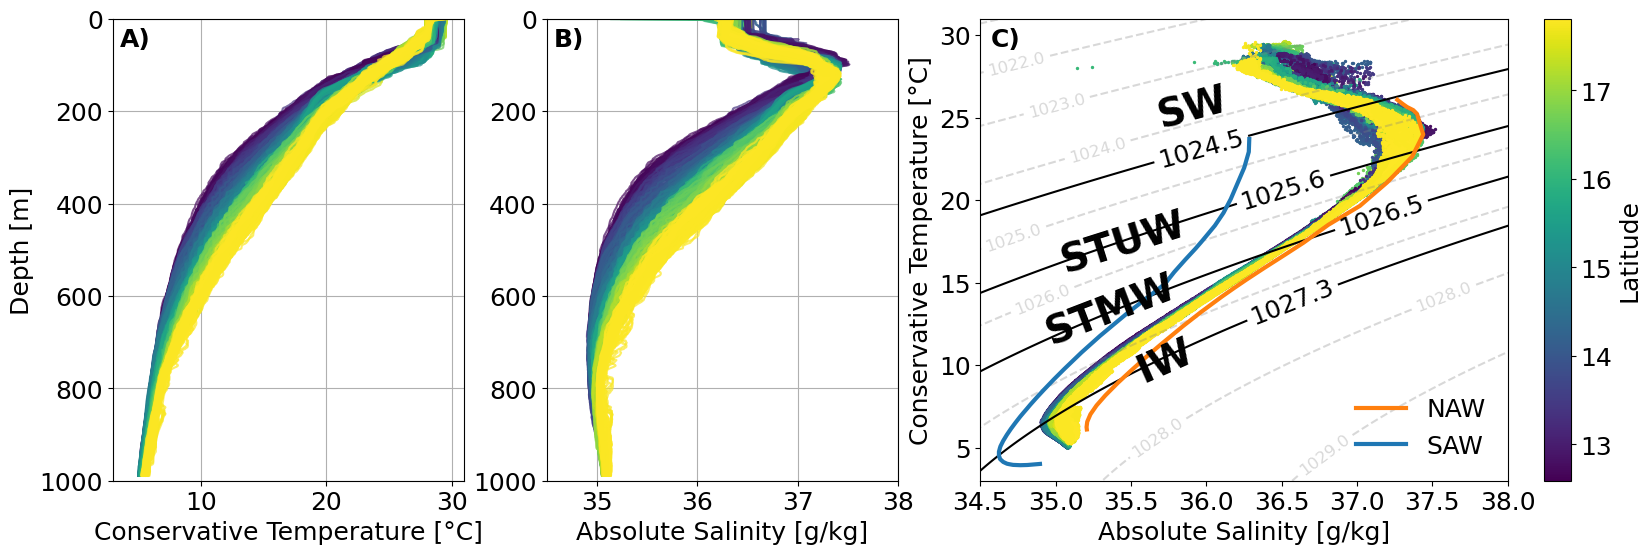

In [9]:
fontsize = 18

# Assume these variables exist and are properly shaped
temp = subset_glider.conservative_temperature  # (time, depth)
salt = subset_glider.absolute_salinity         # (time, depth)
lat = subset_glider.latitude                   # (time,)
depth = subset_glider.depth                    # (depth,)

# Create figure
fig = plt.figure(figsize=(18, 6))
gs = GridSpec(1, 3, width_ratios=[1, 1, 1.5])


ax0 = fig.add_subplot(gs[0])
# Convert to numpy for plotting
temp_np = temp.values.T  # Now shape is (time, depth)
salt_np = salt.values.T  # Now shape is (time, depth)
lat_np = lat.values
depth_np = depth.values

# Left panel: Temperature vs Depth, colored by Latitude
for i in reversed(range(temp_np.shape[0])):
    ax0.plot(temp_np[i, :], depth_np, color=plt.cm.viridis((lat_np[i] - lat_np.min()) / (lat_np.max() - lat_np.min())), alpha=0.7)
ax0.set_ylabel('Depth [m]',fontsize=fontsize)
ax0.set_xlabel('Conservative Temperature [°C]',fontsize=fontsize)
ax0.set_ylim(1000,0)
ax0.set_xlim(3, 31)
ax0.grid()
ax0.text(0.02,0.94,'A)', transform=ax0.transAxes, size=fontsize, weight='bold')


# Middle panel: Salinity vs Depth, colored by Latitude
ax1 = fig.add_subplot(gs[1])
for i in reversed(range(salt_np.shape[0])):
    ax1.plot(salt_np[i, :], depth_np, color=plt.cm.viridis((lat_np[i] - lat_np.min()) / (lat_np.max() - lat_np.min())), alpha=0.7)
ax1.set_xlabel('Absolute Salinity [g/kg]',fontsize=fontsize)
ax1.set_ylim(1000,0)
ax1.set_xlim(34.5, 38)
ax1.grid()
ax1.text(0.02,0.94,'B)', transform=ax1.transAxes, size=fontsize, weight='bold')


# Right panel: Temperature vs Salinity, colored by Latitude
ax2 = fig.add_subplot(gs[2])

for i in reversed(range(temp_np.shape[0])):
    ax2.scatter(salt_np[i, :], temp_np[i, :], color=plt.cm.viridis((lat_np[i] - lat_np.min()) / (lat_np.max() - lat_np.min())), s=2)
ax2.set_xlabel('Absolute Salinity [g/kg]',fontsize=fontsize)
ax2.set_ylabel('Conservative Temperature [°C]',fontsize=fontsize)
ax2.set_ylim(3, 31)
ax2.set_xlim(34.5, 38)
ax2.text(0.02,0.94,'C)', transform=ax2.transAxes, size=fontsize, weight='bold')\

######## This plots the contours
mint=1
maxt=30
mins=34
maxs=37.5
n =499
tempL=np.linspace(mint-1,maxt+1,n)
salL=np.linspace(mins-1,maxs+1,n)
Tg, Sg = np.meshgrid(tempL,salL)

z=np.linspace(-1000,0,n)
p = gsw.p_from_z(z,lat=0)

sigma_theta = gsw.sigma0(Sg, Tg)+1000

cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),n)
ind = np.argwhere(sigma_theta > 1015.7)
st_short = sigma_theta[ind]

## Thin bois
cs = ax2.contour(Sg, Tg, sigma_theta, colors='grey', alpha=0.3,linestyles='dashed', zorder=1 ,levels=np.arange(1021,1030,1))
levels = cs.levels
manual_locations = [(34.75, 28), (35,26), (35.25,24),(34.75, 17), (35,12), (37.5,16), (35.5,8),(36.75,5)]
ax2.clabel(cs,levels, fontsize=12,inline=True,fmt='%.1f', manual=manual_locations)

# Thick bois
cs = ax2.contour(Sg, Tg, sigma_theta, colors='black', zorder=1 ,levels=[1024.5,1025.6,1026.5,1027.3])
levels = cs.levels
manual_locations = [(36, 22), (36.5,21), (37.2,18), (36.65,12)]
ax2.clabel(cs,levels, fontsize=fontsize,inline=True,fmt='%.1f', manual=manual_locations)


ax2.text(35.65,24.4,'SW',fontsize=28,weight='bold',rotation=15)
ax2.text(35,15.6,'STUW',fontsize=28,weight='bold',rotation=17.5)
ax2.text(34.9,11.3,'STMW',fontsize=28,weight='bold',rotation=21)
ax2.text(35.5,9,'IW',fontsize=28,weight='bold',rotation=24)


ax2.plot(end_member_profiles.naw_sal, end_member_profiles.naw_temp, color='tab:orange', linewidth=3,label='NAW')
ax2.plot(end_member_profiles.saw_sal, end_member_profiles.saw_temp, color='tab:blue',  linewidth=3,label='SAW')
ax2.legend()
ax2.legend(loc='lower right',frameon=False, fontsize=fontsize)


# Add colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=lat_np.min(), vmax=lat_np.max()))
sm.set_array([])
# Manually place colorbar: [left, bottom, width, height]
cbar_ax = fig.add_axes([0.92, 0.11, 0.015, 0.77]) 
cbar = fig.colorbar(sm, cax=cbar_ax, label='Latitude')
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_label('Latitude', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)


ax0.tick_params(axis='both', which='major', labelsize=fontsize)
ax1.tick_params(axis='both', which='major', labelsize=fontsize)
ax2.tick_params(axis='both', which='major', labelsize=fontsize)


plt.savefig('../figures/RU29_2024_ABC2DR_Temp_Salinity_Depth_Profiles_TS_Colored_Latitude.png', bbox_inches='tight', dpi=300)
